# ALGORITMO DE DESICION PARA CLASIFICACAR

## Universidad del Azuay
### Inteligencia Artificial
#### Integrantes: Emilio Burbano, Edgar Caminos, Marcos Castro, Mateo Carrera, Erick Guaillasaca

### Se Utilizará el DataSet de Iris para este ejemplo, primero se cargarán todas las librerías.

- sklearn para el uso de los árboles de desición, modelos de selección y los datasets.
- graphviz para realizar la gráfica del árbol
- matplotlib para las libreias de gráficas de datos.
- numpy para matrices.

Se instaló la libreria de grrahviz en el prompt del anaconda.

- conda install python-graphviz

- pip install graphviz

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
import numpy as np

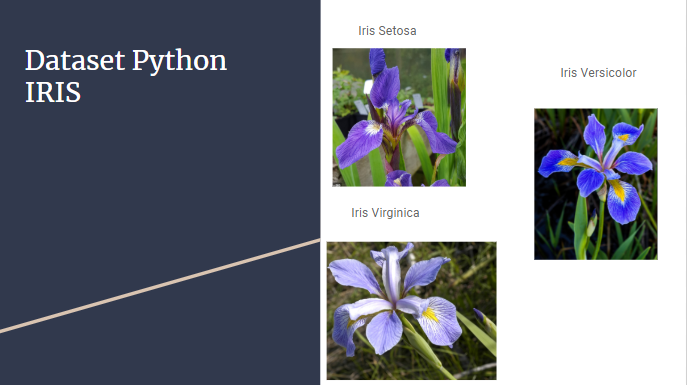

Esta Librería Nos otorga 150 muestras en total de los 3 tipos de Iris, donde no se sabe el número respectivo que pertenece a cada clase.

Al tener los datos cargados, la información de cada nodo es la siguiente:

[**Condición:**] si es un nodo donde se toma alguna decisión.

**[Gini:]** es una medida de impureza. A continuación veremos cómo se calcula.

**[Samples:]** número de muestras que satisfacen las condiciones necesarias para llegar a este nodo.

**[Value:]** cuántas muestras de cada clase llegan a este nodo.

**[Class:]** qué clase se le asigna a las muestras que llegan a este nodo

## Ejemplo de un árbol para Iris
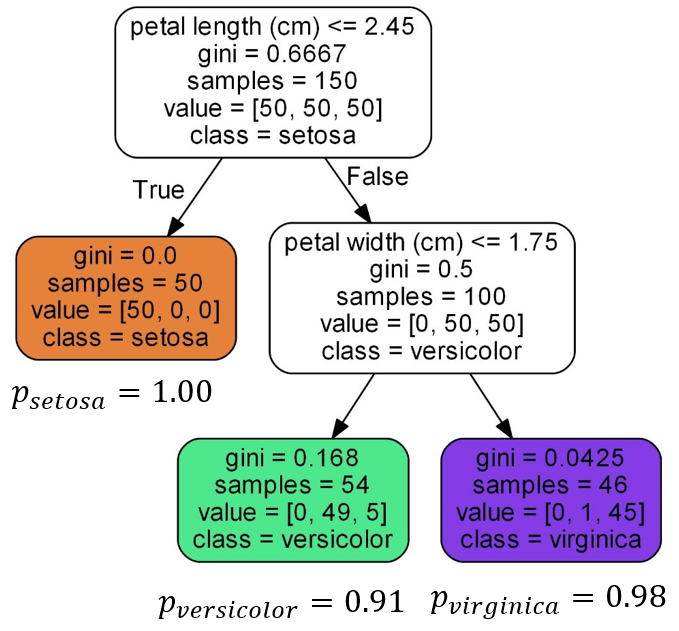

In [53]:
iris=load_iris() #Se carga el dataset de Iris
print(iris.DESCR) # información sobre del conjunto de datos iris

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## Observando de una manera simple datos y Clasificacion

In [73]:
##Obtenemos un rango de las Etiquetas de cada tipo de Iris
print(iris.target[48:200])

# Donde la clase 0 es Iris-Setosa, la 1 es Iris-Versicolor y la 2 es Iris-Virginica

[0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [77]:
# Se obtine un rango de los datos de las flores sin saber a que clase pertenecen
print(iris.data[48:52,:])

#Se puede apreciar los cambios de caracteristicas que existen entre ellas

[[5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]]


In [78]:
##Obtenemos un rango de las Etiquetas de cada tipo de Iris
print(iris.target[48:52])

[0 0 1 1]


### Se realizará una prueba de predicción y de probabilidad

random_state se usa para inicializar el generador interno de números aleatorios, que decidirá la división de datos en índices de tren y prueba en su caso.
Establecer random_state en un valor fijo garantizará que se genere la misma secuencia de números aleatorios cada vez que ejecute el código.

In [85]:
# vamos a usar un árbol de profundidad 2 y una division randomica de 42 datos en el data set
tree = DecisionTreeClassifier(max_depth=2, random_state=42)
tree.fit(iris.data, iris.target) # entrenamiento del árbol

#predict() predice la etiqueta de un nuevo conjunto de datos
print( tree.predict(iris.data[47:53]) )

#devuelve las etiquetas aprendidas, que corresponden  a los datos que se encuentran en la matriz

[0 0 0 1 1 1]


In [86]:
# Para saber las probabilidades, se usa el método predict_proba
print( tree.predict_proba(iris.data[47:53]) )

# la primera clase (Setosa) es la primera columna, la segunda clase Versicolor en la segunda Col. y Virginica 3ra colm.

[[1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.90740741 0.09259259]
 [0.         0.90740741 0.09259259]
 [0.         0.90740741 0.09259259]]


### Vamos a crear y entrenar un árbol de decisión para clasificar los datos de Iris

In [50]:
X_entrena, X_test, y_entrena, y_test=train_test_split(iris.data, iris.target) ##Obtenemos los datos y Etiquetas.
arbol=DecisionTreeClassifier() #Se crea el Arbol de desicion para clasificacion

In [11]:
arbol.fit(X_entrena, y_entrena) # se realiza el entrenamiento en el arbol creado.
#Colocara todos los parametros por default

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
arbol.score(X_test, y_test)  # Se realiza un Testeo, para comprobar su entrenamiento en predicciones

0.9736842105263158

In [13]:
arbol.score(X_entrena, y_entrena) # Se realiza un testeo con los datos de entrenamiento.
#Al dar 1, se supone que nuestros datos de entrenamiento estan sobreAjustados.

1.0

Se crea un archivo .dot el cual va a contener toda la información del árbol entrenado, con el fin de poder graficar nuestro árbol de desición.

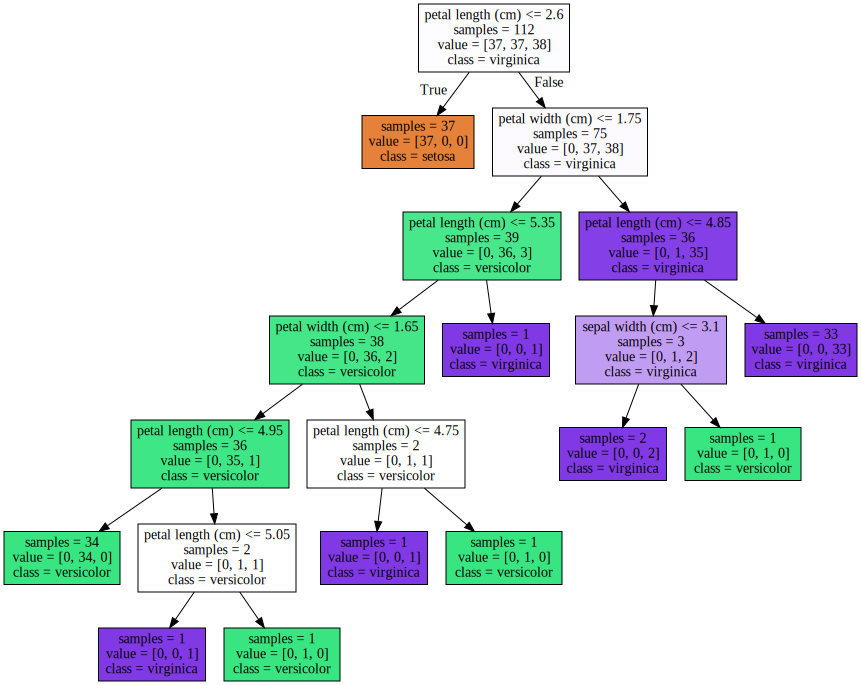

In [17]:
#Se guarda el archivo .dot
export_graphviz(arbol, out_file='arbol.dot', class_names=iris.target_names,
                feature_names=iris.feature_names, impurity=False, filled=True)

##graficamos nuestro arbol
with open('arbol.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

### Se realiza una gráfica de barras, para observar cuales son las caracteristicas que tienen una mayor importancia en el momento de hacer la clasificación.

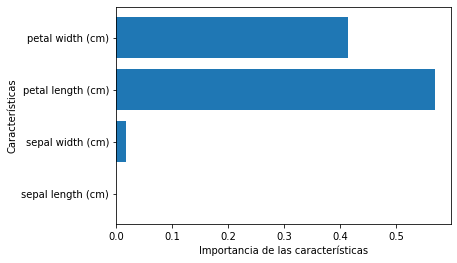

In [20]:
#grafico de barras
caract=iris.data.shape[1] #Regresa una tupla con las caracterisitcas del data de iris.
plt.barh(range(caract),arbol.feature_importances_) #Coloca el valor de importancia de cada caracteristica
plt.yticks(np.arange(caract),iris.feature_names) ##Coloca los nombres de cada una de las caracteristicas
plt.xlabel('Importancia de las características')
plt.ylabel('Características')
plt.show()

In [40]:
#Se modifica el nivel de profundidad del arbol y se lo vuelve a entrenar
#La profundidad significa el nivel max que se permite en el arbol, el arbol consta de 6 niveles
arbol=DecisionTreeClassifier(max_depth=5)
arbol.fit(X_entrena, y_entrena)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [41]:
arbol.score(X_test, y_test) #Anteriormente dio 0.9736842105263158

0.9210526315789473

In [47]:
arbol.score(X_entrena, y_entrena) #Anteriormente dio 1

0.9910714285714286

## Creando una Grafica que contiene una clasificacion con predicciones

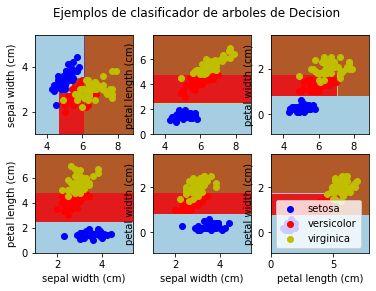

In [45]:
n_classes=3  ## Numero de clases existentes de Iris en el Dataset
##Parametros de Grafica
plot_colors='bry'
plot_step=0.02

for pairidx, pair in enumerate([[0,1],[0,2],[0,3],
                               [1,2],[1,3],[2,3]]):
    X=iris.data[:,pair]  ##Se va Extrayendo cada uno de los datos
    y=iris.target  ##Se extrae la Etiqueta
    
    #entrena algoritmo con un nivel de profundidad 3
    clf=DecisionTreeClassifier(max_depth=3).fit(X,y)
    plt.subplot(2,3,pairidx + 1) ##lo imprime
    
    ##Parámetros para el PLOT
    x_min, x_max=X[:,0].min() - 1, X[:,0].max() +1
    y_min, y_max=X[:,1].min() - 1, X[:,1].max() +1
    xx, yy=np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
    
    ##Se obtendra las predicciones
    Z=clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    ##se obtine las dimension de las tupla y se dibuja los contornos con relleno
    Z=Z.reshape(xx.shape) #Reconstruye la forma de la matriz sin cambiar sus datos
    cs=plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    
    plt.xlabel(iris.feature_names[pair[0]]) #Coloca los nombre de las Caracteristicas en los ejes
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis('tight') ##Parametro para utilizar el diseño ajustado

    #Imprime los puntos de entrenamiento
    for i, color in zip(range(n_classes), plot_colors):
        idx=np.where(y == i)
        plt.scatter(X[idx, 0], X[idx,1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired) ##entrega el golor y modifica radio de los puntos
    plt.axis('tight')

plt.suptitle('Ejemplos de clasificador de arboles de Decision')

plt.legend()
plt.show()